In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pandas_datareader import data
import pandas as pd
# from fecon235.fecon235 import *

# Implementing Black-Scholes Formula in Python

This notebook aims to implement the Black-Scholes options pricing model for a European call option using historical stock price and volatility data. 

**Assumptions** 
The model assumes the following: 
1. The underlying follows a Normal distribution/ Brownian motion
1. There are no arbitrage opportunities in the market
1. The risk-free interest rate is known and constant
1. The stock doesn't pay a dividend
1. We can borrow/lend, buy/sell without constraint
1. No transaction fees

**Equation**
We have the following parameters in the following equations:
$$
\begin{aligned}
S(t) &= \text{Price of underlying asset at time t} \\ 
V(S, t) &= \text{Price of option given the price of the underlying at time t} \\
K &= \text{Strike price of option} \\
\sigma &= \text{Volatility} \\
r &= \text{Risk-free interest rate} \\
\Phi(d) &= \text{CDF of a normally distributed variable} = \frac{1}{\sqrt{2\pi}} \int^d_{-\infty}e^{\frac{-y^2}{2}}dy
\end{aligned}
$$
The Black Scholes model is a partial differential equation that, given the proper change of variables, can be reduced to the heat equation and solved. The partial differential equation for a European call option is: 
$$
\frac{\delta V}{\delta t} + \frac{1}{2}\sigma^2S^2\frac{\delta^2 V}{\delta S^2} + rS\frac{\delta V}{\delta S}-rV = 0
$$
The full solution for a European call option at time T, where the current time $t = 0$ is: 
$$
$$
$$
V(S, t) = S * \Phi(d_1) - Ke^{-r(T-t)}*\Phi(d_2)
$$
$$
$$
Where
$$
\begin{aligned}
d_1 &= \frac{log(S/K) + (r + \sigma^2/2)(T-t)}{\sigma \sqrt{T-t}} \\
d_2 &= \frac{log(S/K) + (r - \sigma^2/2)(T-t)}{\sigma \sqrt{T-t}}
\end{aligned}
$$
$$
$$
Source: http://www.math.unl.edu/~sdunbar1/MathematicalFinance/Lessons/BlackScholes/Solution/solution.pdf

In [4]:
from scipy.stats import norm

def V(T, S, K, r, sigma, t = 0):
    d1 = (np.log(S/K) + (r + sigma**2 / 2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = (np.log(S/K) + (r - sigma**2 / 2) * (T - t)) / (sigma * np.sqrt(T - t))
    
    V = S * norm.cdf(d1) - K * np.exp(-r * (T - t)) * norm.cdf(d2)
    
    return V

# Checking one value 
T = 1.0
S = 120
K = 100
r = 0.12
sigma = 0.10

V(T, S, K, r, sigma)

31.311583629032427

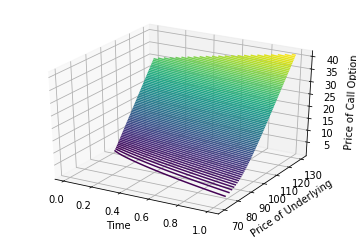

In [5]:
# Graphical implementation (checking my function using the graph from the source) 

K = 100
r = 0.12
sigma = 0.10

m = 100
n = 100
t = np.linspace(0.01, 1.0, m)
s = np.linspace(70, 130, n)

T, S = np.meshgrid(t, s)
V_c = V(T, S, K, r, sigma) 

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(T, S, V_c, 100)
ax.set_xlabel('Time')
ax.set_ylabel('Price of Underlying')
ax.set_zlabel('Price of Call Option')
plt.show()

Now, we want to use historical financial data to implement the Black-Scholes model.

In [7]:
ticker = 'GOOG'
start_date = '2017-01-01'
end_date = '2018-01-01'

panel_data = data.DataReader('INPX', 'google', start_date, end_date)
# This would be really nice to implement but unfortunately google won't let me access the data...

/Users/Kyelee/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


RemoteDataError: Unable to read URL: https://finance.google.com/finance/historical?q=INPX&startdate=Jan+01%2C+2017&enddate=Jan+01%2C+2018&output=csv
Response Text:
b'<html><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><title>Sorry...</title><style> body { font-family: verdana, arial, sans-serif; background-color: #fff; color: #000; }</style></head><body><div><table><tr><td><b><font face=sans-serif size=10><font color=#4285f4>G</font><font color=#ea4335>o</font><font color=#fbbc05>o</font><font color=#4285f4>g</font><font color=#34a853>l</font><font color=#ea4335>e</font></font></b></td><td style="text-align: left; vertical-align: bottom; padding-bottom: 15px; width: 50%"><div style="border-bottom: 1px solid #dfdfdf;">Sorry...</div></td></tr></table></div><div style="margin-left: 4em;"><h1>We\'re sorry...</h1><p>... but your computer or network may be sending automated queries. To protect our users, we can\'t process your request right now.</p></div><div style="margin-left: 4em;">See <a href="https://support.google.com/websearch/answer/86640">Google Help</a> for more information.<br/><br/></div><div style="text-align: center; border-top: 1px solid #dfdfdf;"><a href="https://www.google.com">Google Home</a></div></body></html>'